In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
!pip install plotly
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def load_dataset():
    return pd.read_csv("googleplaystore.csv")
data = load_dataset()

In [ ]:
def print_summarize_dataset(dataset):
  print(f"\n-Dataset demension-{data.shape}")
  print(f"\n-First 15 rows of Dataset-{data.head(15)}")
  print(f"\n-Dataset describe-{data.describe()}")
print_summarize_dataset(data)


-Dataset demension-(10841, 13)

-First 15 rows of Dataset-                                                  App        Category  Rating  \
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                 Coloring book moana  ART_AND_DESIGN     3.9   
2   U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4               Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                          Paper flowers instructions  ART_AND_DESIGN     4.4   
6             Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                    Infinite Painter  ART_AND_DESIGN     4.1   
8                                Garden Coloring Book  ART_AND_DESIGN     4.4   
9                       Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   
10                            Text on Photo - Font

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
def clean_dataset(data):
  data.dropna(axis=0, inplace=True)
  data["Reviews"] = data["Reviews"].astype(np. int)
  data["Category"] = data["Category"].astype("string")
  data["Installs"] = data["Installs"].str.replace("+", "").str.replace(",","").astype(int)
  data["Price"] = data["Price"].str.replace("$",'').astype(np.float)
  data["Last Updated"] = pd.to_datetime(data['Last Updated'])
  data["Genres"] = data["Genres"].str.replace("&", "and" ).astype ("string")
  data["Size" ] = data["Size"].str.replace("Varies with device","NaN")
  data_size = data[data["Size"].str.contains("k",regex=False)]
  data_size["Size"] = data_size["Size"].str.replace("k", '').astype(float)/1000
  data["Size"].update(data_size["Size"])
  data["Size"] = data["Size"].str.replace("M", '').astype(float)
  data["Size"] = data["Size"].fillna(np.mean(data["Size"]))
  data["Content Rating"] = data["Content Rating"].str.replace("+", '')
  return data
clean_data = clean_dataset(data)
clean_data

<ipython-input-7-e01b614b6a4c>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data["Reviews"] = data["Reviews"].astype(np. int)
<ipython-input-7-e01b614b6a4c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = data["Installs"].str.replace("+", "").str.replace(",","").astype(int)
<ipython-input-7-e01b614b6a4c>:6: FutureWarning: The default value of regex will change from Tr

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art and Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art and Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art and Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art and Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art and Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,23.746317,1000,Free,0.0,Mature 17,Books and Reference,2015-01-19,Varies with device,Varies with device


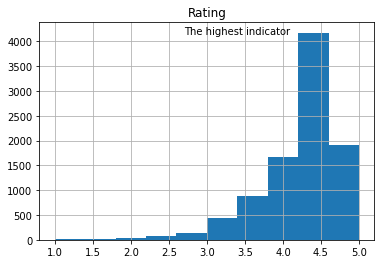

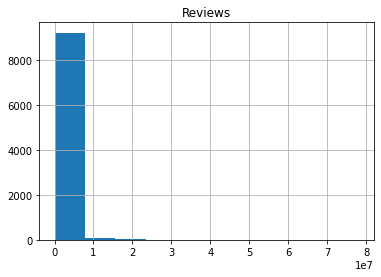

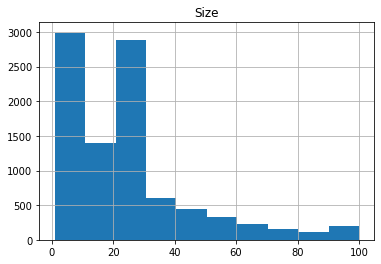

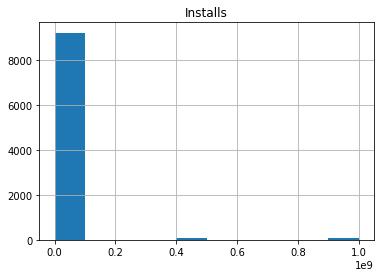

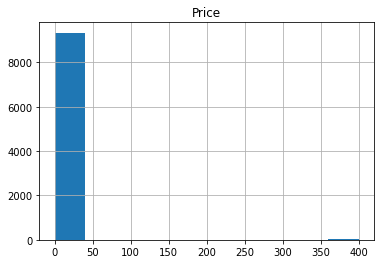

In [ ]:
import matplotlib.pyplot as plt
def print_histograms(dataset):
  plt.title("Rating")
  plt.hist(dataset["Rating"])
  plt.text(2.7, 4150, 'The highest indicator')
  plt.grid(True)
  plt.show()
  plt.title("Reviews")
  plt.hist(dataset["Reviews"])
  plt.grid(True)
  plt.show()
  plt.title("Size")
  plt.hist(dataset["Size"])
  plt.grid(True)
  plt.show()
  plt.title("Installs")
  plt.hist(dataset["Installs"])
  plt.grid(True)
  plt.show()
  plt.title("Price")
  plt.hist(dataset["Price"])
  plt.grid(True)
  plt.show()
print_histograms(data)

In [ ]:
empty_list = []
def my_family_df(dataset):
    for i in data["Category"]:
        if i == "Family":
            fig = px.histogram(data["Type"])
            fig.show()
            break
my_family_df(clean_dataset)

In [ ]:
def my_area(clean_dataset):
    look = px.area(clean_dataset["Category"], facet_col = clean_dataset["Rating"], facet_col_wrap = 8, title = "Category of Rating")
    look.show()
my_area(data)

In [ ]:
def my_pentagon_figure(clean_dataset):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    name="Raw Data",
    mode="markers",x=clean_dataset["Price"],y=clean_dataset["Rating"],
    marker_symbol="pentagon"))
    fig.update_xaxes(showgrid=True, ticklabelmode="period")
    fig.show()
my_pentagon_figure(data) 

In [ ]:
def freg_of_ratings(dataset):
  plt.figure(figsize=(10,5))
  plt.title('rating despensation', fontsize=10)
  sns.histplot(data = dataset, x="Rating", kde=True,color="green")
  plt.show()
# freg_of_ratings(clean_dataset)

In [ ]:
def get_wino_style(dataset):
    plt.figure(figsize=(10, 5))
    plt.title("The Rating", fontsize = 25)
    sns.countplot(y="Rating", data=dataset, palette = "Set2")
# get_wino_style(clean_dataset)

In [ ]:
def print_scatter_matrix(clean_dataset):
    fig=go.Figure()
    fig.add_trace(go.Scatter(
    name = "Raw Data",
    mode = "markers", x=clean_dataset["Installs"], y=clean_dataset["Rating"],
    marker_symbol="circle-dot"
    ))
    fig.update_xaxes(showgrid=True,ticklabelmode="period")
    fig.show()
# print_scatter_matrix(clean_dataset)

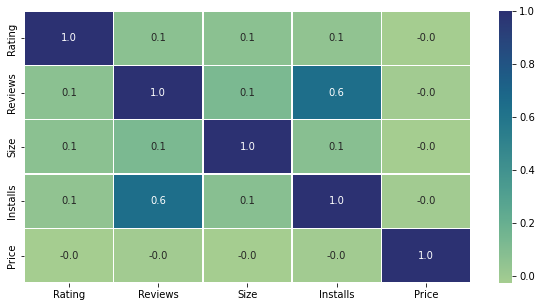

In [ ]:
def compute_correlations_matrix(dataset):
    data.corr()
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 5))
    sns.heatmap(corr_matrix, annot=True, cmap="crest",fmt=".1f",linewidth=.5)
    plt.show()
compute_correlations_matrix(clean_dataset)

In [ ]:
print()

abcd
